In [1]:
import numpy as np 
import pandas as pd 
from glob import glob 
import os 
from pathlib import Path
import cv2
import matplotlib.pyplot as plt

#annot_csv=Path("D:/OAK_D_img/oak-d-camera/bbox_package/week4/week4.csv")#D:/00_NCSU/00_Resources/00_Datasets/PartTimePSA/OPENCV/annotations/week4/week4.csv")#
#data_dir=Path("D:/OAK_D_img/oak-d-camera/weeks/week4/")
#RGB_IMAGE_SIZE = (1080,1920)
#DEPTH_IMAGE_SIZE = (720,1280)

In [2]:
df = pd.read_hdf('complete_h5_v2.h5')

In [3]:
df = df[df['Biomass'].notna()]
#df['Biomass'][~df.isnull()]
df.head()
#print(df_withBiomass)
print(df['Biomass'][:])

0      0.511
1      0.051
2      0.390
3      0.564
4      0.696
       ...  
156    1.101
157    4.320
158    2.478
159    3.157
160    1.710
Name: Biomass, Length: 143, dtype: float64


In [4]:
#df = df[df['sd_ndi'].notna()]
#df['Biomass'][~df.isnull()]
#df.head()
#print(df_withBiomass)
#print(df['sd_ndi'][:])

In [5]:
df.head()

,date,time,week,row,stop,image,speciesid,commonname,annotation_file,mask_dir,...,all_exr,m_exr,sd_exr,all_ndi,m_ndi,sd_ndi,all_exg_exr,m_exg_exr,sd_exg_exr,all_sumbinary
0,20210415,153241,wk4,row9,stop16,wk4_row9_stop16_20210415_153241_rgb.png,5.0,grass,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,...,435066.0,3.798840,14.253662,1.837332e+06,16.042924,77.308103,875598.0,7.645408,33.187587,2224708.0
1,20210414,101652,wk4,row1,stop1,wk4_row1_stop1_20210414_101652_rgb.png,0.0,clover,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,...,34733.0,1.697605,7.917185,6.868132e+05,33.568583,85.688911,470141.0,22.978543,56.124599,797440.0
2,20210415,152931,wk4,row9,stop12,wk4_row9_stop12_20210415_152931_rgb.png,5.0,grass,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,...,590168.0,5.454468,16.459734,2.211031e+06,20.434857,86.908654,936668.0,8.656901,34.819423,2866445.0
3,20210415,150825,wk4,row8,stop9,wk4_row8_stop9_20210415_150825_rgb.png,1.0,broadleaf,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,...,1257517.0,16.887356,20.730387,6.091072e+06,81.797779,169.360807,3009847.0,40.419620,50.344683,8993165.0
4,20210414,124844,wk4,row7,stop6,wk4_row7_stop6_20210414_124844_rgb.png,2.0,broadleaf,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,...,748133.0,4.988052,8.459495,1.293938e+07,86.271144,165.364648,7451514.0,49.681728,60.435376,15840057.0


In [6]:
stats = df['stats'].to_numpy()
print(len(stats))

features = 13
features_vector = np.zeros((len(stats),features))

print(features_vector.shape)
                        
for i in range(len(stats)):
               features_vector[i][:] = stats[i][0:features]

#print(features_vector[:,1])      
#print(features_vector[1][:])  
 


143
(143, 13)


In [7]:
df['all_exg'] = features_vector[:,0]
df['m_exg'] = features_vector[:,1]
df['sd_exg'] = features_vector[:,2]
df['all_exr'] = features_vector[:,3]
df['m_exr'] = features_vector[:,4]
df['sd_exr'] = features_vector[:,5]
df['all_ndi'] = features_vector[:,6]
df['m_ndi'] = features_vector[:,7]
df['sd_ndi'] = features_vector[:,8]
df['all_exg_exr'] = features_vector[:,9]
df['m_exg_exr'] = features_vector[:,10]
df['sd_exg_exr'] = features_vector[:,11]
df['all_sumbinary'] = features_vector[:,12]

In [7]:
df.to_hdf('complete_h5_v2.h5', key='df')

d:\intel\openvino_notebooks\openvino_env\lib\site-packages\pandas\core\generic.py:2449: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['week', 'row', 'stop', 'image', 'commonname', 'annotation_file',
       'mask_dir', 'image_file', 'image_dir', 'depth_dir', 'disp_map_dir',
       'annotations', 'depth_slices', 'mask', 'disp_maps', 'histograms',
       'histograms_map', 'origin', 'exg', 'exr', 'ndi', 'exg-exr', 'area',
       'stats', 'frequency', 'bins'],
      dtype='object')]

  encoding=encoding,


In [8]:
df = pd.read_hdf('complete_h5_v2.h5')

In [ ]:
df.to_csv("complete_dataframe.csv", index = False)

In [9]:
df.head()

,date,time,week,row,stop,image,speciesid,commonname,annotation_file,mask_dir,...,all_exr,m_exr,sd_exr,all_ndi,m_ndi,sd_ndi,all_exg_exr,m_exg_exr,sd_exg_exr,all_sumbinary
0,20210415,153241,wk4,row9,stop16,wk4_row9_stop16_20210415_153241_rgb.png,5.0,grass,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,...,435066.0,3.798840,14.253662,1.837332e+06,16.042924,77.308103,875598.0,7.645408,33.187587,2224708.0
1,20210414,101652,wk4,row1,stop1,wk4_row1_stop1_20210414_101652_rgb.png,0.0,clover,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,...,34733.0,1.697605,7.917185,6.868132e+05,33.568583,85.688911,470141.0,22.978543,56.124599,797440.0
2,20210415,152931,wk4,row9,stop12,wk4_row9_stop12_20210415_152931_rgb.png,5.0,grass,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,...,590168.0,5.454468,16.459734,2.211031e+06,20.434857,86.908654,936668.0,8.656901,34.819423,2866445.0
3,20210415,150825,wk4,row8,stop9,wk4_row8_stop9_20210415_150825_rgb.png,1.0,broadleaf,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,...,1257517.0,16.887356,20.730387,6.091072e+06,81.797779,169.360807,3009847.0,40.419620,50.344683,8993165.0
4,20210414,124844,wk4,row7,stop6,wk4_row7_stop6_20210414_124844_rgb.png,2.0,broadleaf,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,...,748133.0,4.988052,8.459495,1.293938e+07,86.271144,165.364648,7451514.0,49.681728,60.435376,15840057.0


<class 'pandas.core.series.Series'>


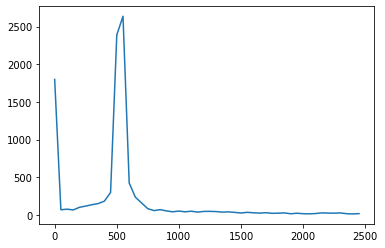

In [8]:
print(type(df['frequency']))
plt.plot(df['bins'][1][0:50], df['frequency'][50][0:50])
plt.show()
b=df['frequency'][1][0:50]
df_b=pd.DataFrame(b)
#df['frequency'][1][1:50]
df_freq=pd.DataFrame(df['frequency'][:][0:50])


In [9]:

df["commonname"].replace({" grass": "grass"}, inplace=True)

#print(df['commonname'])
#print(df.loc[df['commonname'] == 'grass'])



In [10]:
df_grass = df.loc[df['commonname'] == 'grass']
df_broadl = df.loc[df['commonname'] == 'broadleaf']
df_clover = df.loc[df['commonname'] == 'clover']

In [11]:
nested_histogram_data_broadleaf = df_broadl['histograms'].to_numpy()
NUM_BINS = 50

# Allocate the memory for the histogram matrix
histogram_data_broadleaf = np.zeros((len(nested_histogram_data_broadleaf),NUM_BINS))
    
for i in range(0,len(nested_histogram_data_broadleaf)):
    histogram_data_broadleaf[i,:] = nested_histogram_data_broadleaf[i][0][0:NUM_BINS]

In [12]:
print(df_broadl['histograms'].to_numpy())

[(array([7501,  245,  310, ...,  120,  191,  243], dtype=int64), array([    0,    50,   100, ..., 65400, 65450, 65500]))
 (array([14878,   497,   484, ...,   198,   321,   336], dtype=int64), array([    0,    50,   100, ..., 65400, 65450, 65500]))
 (array([5086,  185,  201, ...,   54,   57,   79], dtype=int64), array([    0,    50,   100, ..., 65400, 65450, 65500]))
 (array([3352,  109,  132, ...,   28,   39,   46], dtype=int64), array([    0,    50,   100, ..., 65400, 65450, 65500]))
 (array([11526,   336,   346, ...,   188,   275,   358], dtype=int64), array([    0,    50,   100, ..., 65400, 65450, 65500]))
 (array([3001,   96,  100, ...,   19,   18,   18], dtype=int64), array([    0,    50,   100, ..., 65400, 65450, 65500]))
 (array([2026,   73,   81, ...,    0,    1,    0], dtype=int64), array([    0,    50,   100, ..., 65400, 65450, 65500]))
 (array([7310,  221,  249, ...,  108,  142,  213], dtype=int64), array([    0,    50,   100, ..., 65400, 65450, 65500]))
 (array([4928,  179,

In [14]:
nested_histogram_data_clover = df_clover['histograms'].to_numpy()
NUM_BINS = 50

# Allocate the memory for the histogram matrix
histogram_data_clover = np.zeros((len(nested_histogram_data_clover),NUM_BINS))
    
for i in range(0,len(nested_histogram_data_clover)):
    histogram_data_clover[i,:] = nested_histogram_data_clover[i][0][0:NUM_BINS]

In [15]:
nested_histogram_data_grass = df_grass['histograms'].to_numpy()
NUM_BINS = 50

# Allocate the memory for the histogram matrix
histogram_data_grass = np.zeros((len(nested_histogram_data_grass),NUM_BINS))
    
for i in range(0,len(nested_histogram_data_grass)):
    histogram_data_grass[i,:] = nested_histogram_data_grass[i][0][0:NUM_BINS]

In [16]:

features = 20

biomass_grass =np.zeros(len(histogram_data_grass))
biomass_clover = np.zeros(len(histogram_data_clover))
biomass_broadl =np.zeros(len(histogram_data_broadleaf))

for i in range(len(histogram_data_grass)):
    biomass_grass[i] = sum(histogram_data_grass[i][0:features])
    #print(sum(histogram_data_grass[i][0:features]))
#print(biomass_grass)

for i in range(len(histogram_data_clover)):
    biomass_clover[i] = sum(histogram_data_clover[i][0:features])
    #print(sum(histogram_data_clover[i][0:features]))
#print(biomass_clover)

for i in range(len(histogram_data_grass)):
    biomass_broadl[i] = sum(histogram_data_broadleaf[i][0:features])
    #print(sum(histogram_data_broadleaf[i][0:features]))
#print(biomass_broadl)

df_grass['sum_depth'] = biomass_grass
df_clover['sum_depth'] = biomass_clover
df_broadl['sum_depth'] = biomass_broadl

#print(df_grass['sum_depth'])
#print(df_clover['sum_depth'])
#print(df_broadl['sum_depth'])

#print(len(histogram_data_grass))
#print(len(histogram_data_clover))
#print(len(histogram_data_broadleaf))
    
#print((histogram_data_grass[11]))
#print((histogram_data_clover[11]))
#print((histogram_data_broadleaf[11]))

d:\intel\openvino_notebooks\openvino_env\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\intel\openvino_notebooks\openvino_env\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\intel\openvino_notebooks\openvino_env\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [17]:
df_grass.to_csv("grass_dataframe.csv", index = False)
df_clover.to_csv("clover_dataframe.csv", index = False)
df_broadl.to_csv("broadl_dataframe.csv", index = False)


## Before importance calc

0        77.308103
1        85.688911
2        86.908654
3       169.360807
4       165.364648
          ...     
156    1135.689303
157    1629.133874
158    1378.306637
159     948.110602
160     835.671902
Name: sd_ndi, Length: 143, dtype: float64


## Random Forest 6 features

Text(0.5, 1.0, 'Area')

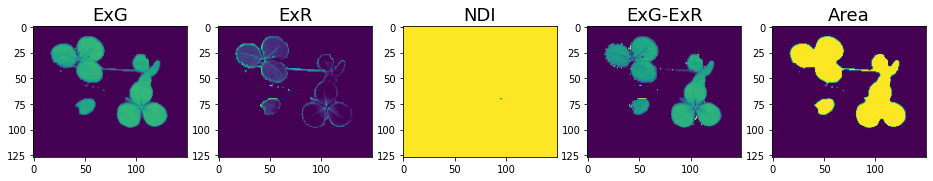

In [28]:
test_img = 14
plt.figure(figsize=(16,16)); 
plt.subplot(151); plt.imshow(df['exg'][test_img]); plt.title('ExG',fontsize=18)
plt.subplot(152); plt.imshow(df['exr'][test_img]); plt.title('ExR',fontsize=18) 
plt.subplot(153); plt.imshow(df['ndi'][test_img]); plt.title('NDI',fontsize=18)
plt.subplot(154); plt.imshow(df['exg-exr'][test_img]); plt.title('ExG-ExR',fontsize=18)
plt.subplot(155); plt.imshow(df['area'][test_img]); plt.title('Area',fontsize=18)

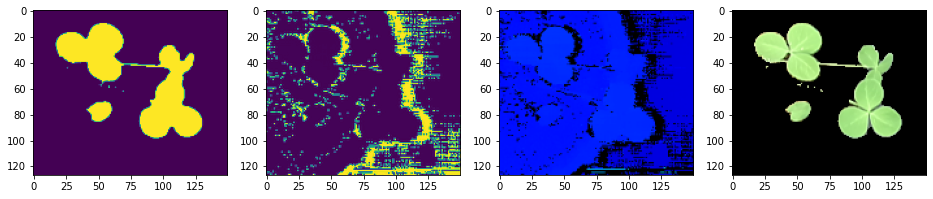

In [29]:
plt.figure(figsize=(16,16)); 
plt.subplot(141);plt.imshow(df['mask'][test_img]); 
plt.subplot(142); plt.imshow(df['depth_slices'][test_img]); 
plt.subplot(143); plt.imshow(df['disp_maps'][test_img])
plt.subplot(144); plt.imshow(df['origin'][test_img])

In [55]:
import sklearn.ensemble as ske

X_grass = pd.DataFrame(df_grass[['all_exg','m_exg','sd_exg', 'all_exr', 'm_exr', 'sd_exr', 'all_sumbinary','sum_depth']]) #'all_exg_exr','m_exg_exr', 'sd_exg_exr'
X_broadl = pd.DataFrame(df_broadl[['all_exg','m_exg','sd_exg', 'all_exr', 'm_exr', 'sd_exr','all_sumbinary', 'sum_depth']])
X_clover = pd.DataFrame(df_clover[['all_exg','m_exg','sd_exg', 'all_exr', 'm_exr', 'sd_exr', 'all_sumbinary', 'sum_depth']])

y_grass = pd.DataFrame(df_grass['Biomass'])
y_broadl = pd.DataFrame(df_broadl['Biomass'])
y_clover = pd.DataFrame(df_clover['Biomass'])

features = ["All_ExG", "Mean_ExG", "Std_ExG", "All_ExR", "Mean_ExR", "Std_ExR", "Area", "CHM"]#"All_ExG-ExR", "Mean_ExG-ExR", "Std_ExG-ExR", 
print(features)
#print(X_clover)

['All_ExG', 'Mean_ExG', 'Std_ExG', 'All_ExR', 'Mean_ExR', 'Std_ExR', 'Area', 'CHM']


In [49]:
reg_grass = ske.RandomForestRegressor()
reg_broadl = ske.RandomForestRegressor()
reg_clover = ske.RandomForestRegressor()

In [50]:
reg_grass.fit(X_grass, y_grass)
reg_clover.fit(X_clover, y_clover)
reg_broadl.fit(X_broadl, y_broadl)

d:\intel\openvino_notebooks\openvino_env\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
d:\intel\openvino_notebooks\openvino_env\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
d:\intel\openvino_notebooks\openvino_env\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor()

In [51]:
fet_ind_grass = np.argsort(reg_grass.feature_importances_)[::-1]
fet_imp_grass = reg_grass.feature_importances_[fet_ind_grass]
print(fet_ind_grass)
print(fet_ind_grass.shape)
print(fet_imp_grass)
print(fet_imp_grass.shape)

[6 1 7 0 3 2 4 5]
(8,)
[0.49191498 0.16557927 0.0947791  0.08077497 0.0682756  0.04176321
 0.03023844 0.02667443]
(8,)


In [52]:
fet_ind_clover = np.argsort(reg_clover.feature_importances_)[::-1]
fet_imp_clover = reg_clover.feature_importances_[fet_ind_clover]
print(fet_ind_clover)
print(fet_ind_clover.shape)
print(fet_imp_clover)
print(fet_imp_clover.shape)

[6 0 3 7 2 5 4 1]
(8,)
[0.46552367 0.11888836 0.11599828 0.09704843 0.0748955  0.06391573
 0.04109399 0.02263604]
(8,)


In [53]:
fet_ind_broadl = np.argsort(reg_broadl.feature_importances_)[::-1]
fet_imp_broadl = reg_broadl.feature_importances_[fet_ind_broadl]
print(fet_ind_broadl)
print(fet_ind_broadl.shape)
print(fet_imp_broadl)
print(fet_imp_broadl.shape)

[1 0 6 2 5 3 7 4]
(8,)
[0.39122467 0.16862876 0.15268759 0.06967166 0.0638014  0.06309573
 0.05738571 0.03350449]
(8,)


(8, 1)


Text(0.5, 1.0, 'Features importance - Biomass Grass')

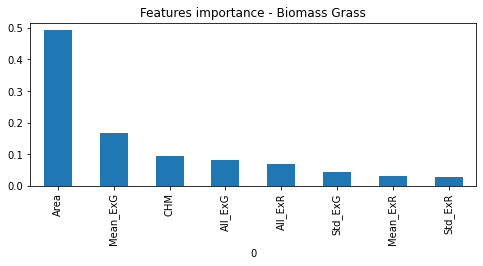

In [56]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 3))
features_df = pd.DataFrame(features)
labels = features_df[0][:][fet_ind_grass]
print(features_df.shape)
pd.Series(fet_imp_grass, index=labels).plot(kind='bar')
ax1.set_title('Features importance - Biomass Grass')



Text(0.5, 1.0, 'Features importance - Biomass Broadleaf')

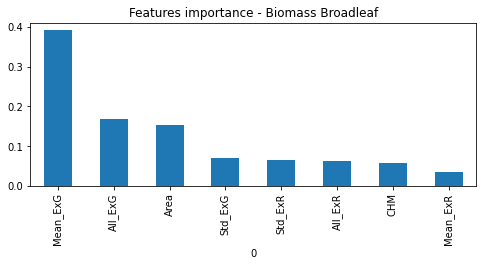

In [57]:
fig, ax2 = plt.subplots(1, 1, figsize=(8, 3))
features_df = pd.DataFrame(features)
labels = features_df[0][:][fet_ind_broadl]
pd.Series(fet_imp_broadl, index=labels).plot(kind='bar')
ax2.set_title('Features importance - Biomass Broadleaf')


Text(0.5, 1.0, 'Features importance - Biomass Clover')

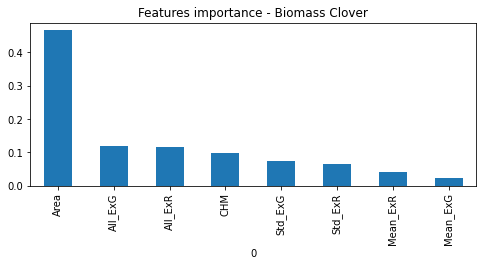

In [58]:
fig, ax3 = plt.subplots(1, 1, figsize=(8, 3))
features_df = pd.DataFrame(features)
labels = features_df[0][:][fet_ind_clover]
pd.Series(fet_imp_clover, index=labels).plot(kind='bar')
ax3.set_title('Features importance - Biomass Clover')

## Testing Random Forest as predictor

In [80]:
from sklearn.model_selection import train_test_split

X_train_grass, X_test_grass, y_train_grass, y_test_grass = train_test_split(X_grass, y_grass, test_size = 0.3, random_state =0)
X_train_clover, X_test_clover, y_train_clover, y_test_clover = train_test_split(X_clover, y_clover, test_size = 0.3, random_state =0)
X_train_broadl, X_test_broadl, y_train_broadl, y_test_broadl = train_test_split(X_broadl, y_broadl, test_size = 0.3, random_state =0)

In [89]:
import joblib

y_predic_grass = reg_grass.predict(X_test_grass)
y_predic_clover = reg_clover.predict(X_test_clover)
y_predic_broadl = reg_broadl.predict(X_test_broadl)

joblib.dump(reg_grass, "./random_forest_grass.joblib")
joblib.dump(reg_clover, "./random_forest_clover.joblib")
joblib.dump(reg_broadl, "./random_forest_broadl.joblib")

['./random_forest_broadl.joblib']

In [82]:
from sklearn.metrics import r2_score
r2_grass = r2_score(y_test_grass, y_predic_grass)
r2_clover = r2_score(y_test_clover, y_predic_clover)
r2_broadl = r2_score(y_test_broadl, y_predic_broadl)
print(r2_grass)
print(r2_clover)
print(r2_broadl)

0.9178257866379115
0.9011993735266308
0.9310558873479591


## Stats

In [84]:
import statsmodels.api as sm
# Note the difference in argument order
model_grass = sm.OLS(y_grass, X_grass).fit()
predictions_grass = model_grass.predict(X_grass) # make the predictions by the model
model_grass.save("model_grass_stats.pickle")
# Print out the statistics
model_grass.summary()


#import matplotlib.pyplot as plt
#plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
#plt.text(0.01, 0.05, str(model_grass.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
#plt.axis('off')
#plt.tight_layout()
#plt.savefig('output_model_grass.png')

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Biomass   R-squared (uncentered):                   0.869
Model:                            OLS   Adj. R-squared (uncentered):              0.837
Method:                 Least Squares   F-statistic:                              27.28
Date:                Tue, 15 Jun 2021   Prob (F-statistic):                    2.02e-12
Time:                        17:08:26   Log-Likelihood:                         -44.118
No. Observations:                  41   AIC:                                      104.2
Df Residuals:                      33   BIC:                                      117.9
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
all_exg       -2.389e-07   1.81e-07     -1.317      0.197   -6.08e-07     1.3e-07
m_exg             0.0575      0.037      1.544      0.132      -0.018       0.133
sd_exg           -0.0254      0.019     -1.327      0.193      -0.064       0.014
all_exr        4.137e-08   1.99e-07      0.208      0.836   -3.63e-07    4.46e-07
m_exr            -0.0834      0.068     -1.235      0.226      -0.221       0.054
sd_exr            0.0641      0.039      1.659      0.107      -0.014       0.143
all_sumbinary  1.633e-07   1.01e-07      1.620      0.115   -4.17e-08    3.68e-07
sum_depth     -2.425e-07   3.53e-06     -0.069      0.946   -7.42e-06    6.93e-06
==============================================================================
Omnibus:                        7.826   Durbin-Watson:                   2.573
Prob(Omnibus):                  0.020   Jarque-Bera (JB):               13.840
Skew:                          -0.184   Prob(JB):                     0.000988
Kurtosis:                       5.822   Cond. No.                     1.32e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.32e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
#df = df[df['Biomass'].notna()]
#df['Biomass'][~df.isnull()]
#df.head()
#print(df_withBiomass)

# Note the difference in argument order
model_clover = sm.OLS(y_clover, X_clover).fit()
predictions_clover = model_clover.predict(X_clover) # make the predictions by the model
model_clover.save("model_clover_stats.pickle")
# Print out the statistics
model_clover.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Biomass   R-squared (uncentered):                   0.833
Model:                            OLS   Adj. R-squared (uncentered):              0.805
Method:                 Least Squares   F-statistic:                              29.84
Date:                Tue, 15 Jun 2021   Prob (F-statistic):                    4.07e-16
Time:                        17:08:33   Log-Likelihood:                          23.243
No. Observations:                  56   AIC:                                     -30.49
Df Residuals:                      48   BIC:                                     -14.28
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
all_exg       -3.942e-07    3.5e-07     -1.128      0.265    -1.1e-06    3.09e-07
m_exg         -1.819e-05      0.006     -0.003      0.997      -0.011       0.011
sd_exg            0.0006      0.003      0.180      0.858      -0.006       0.007
all_exr        3.496e-07   8.21e-07      0.426      0.672    -1.3e-06       2e-06
m_exr             0.0038      0.048      0.081      0.936      -0.092       0.100
sd_exr           -0.0046      0.016     -0.292      0.772      -0.036       0.027
all_sumbinary  3.199e-07   1.84e-07      1.736      0.089   -5.06e-08     6.9e-07
sum_depth      3.962e-07   6.45e-06      0.061      0.951   -1.26e-05    1.34e-05
==============================================================================
Omnibus:                       31.171   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.141
Skew:                           1.243   Prob(JB):                     2.50e-33
Kurtosis:                      10.626   Cond. No.                     6.12e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
# Note the difference in argument order
model_broadl = sm.OLS(y_broadl, X_broadl).fit()
predictions_broadl = model_broadl.predict(X_broadl) # make the predictions by the model
model_broadl.save("model_broadl_stats.pickle")
# Print out the statistics
model_broadl.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Biomass   R-squared (uncentered):                   0.841
Model:                            OLS   Adj. R-squared (uncentered):              0.808
Method:                 Least Squares   F-statistic:                              25.13
Date:                Tue, 15 Jun 2021   Prob (F-statistic):                    6.30e-13
Time:                        17:08:39   Log-Likelihood:                         -36.174
No. Observations:                  46   AIC:                                      88.35
Df Residuals:                      38   BIC:                                      103.0
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
all_exg        2.518e-09   1.27e-07      0.020      0.984   -2.54e-07    2.59e-07
m_exg             0.0422      0.016      2.576      0.014       0.009       0.075
sd_exg           -0.0300      0.014     -2.114      0.041      -0.059      -0.001
all_exr       -8.105e-08    3.4e-07     -0.239      0.813   -7.68e-07    6.06e-07
m_exr            -0.1075      0.091     -1.182      0.245      -0.292       0.077
sd_exr            0.0916      0.060      1.526      0.135      -0.030       0.213
all_sumbinary  4.516e-08   8.05e-08      0.561      0.578   -1.18e-07    2.08e-07
sum_depth     -3.511e-06   2.18e-06     -1.611      0.115   -7.92e-06    9.01e-07
==============================================================================
Omnibus:                       19.686   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.493
Skew:                           1.328   Prob(JB):                     3.94e-07
Kurtosis:                       5.887   Cond. No.                     2.45e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.45e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## PCA with 8 features

[9.60359575e-01 3.73499175e-02 2.27971607e-03 1.07916416e-05
 4.26650231e-13 1.37775732e-13 3.43142650e-14 1.08138871e-14]


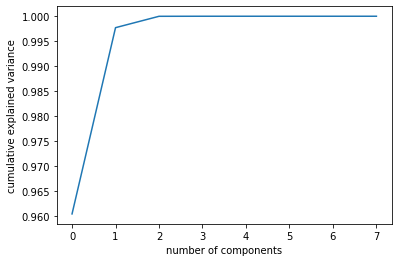

In [62]:
from sklearn.decomposition import PCA
def pca_calc(x):
    return PCA().fit(x)

pca_grass = PCA(n_components=np.min(X_grass.shape))
pca_grass.fit(X_grass)

plt.plot(np.cumsum(pca_grass.explained_variance_ratio_))
print(pca_grass.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

[9.92012556e-01 6.65501120e-03 1.32279378e-03 9.63856735e-06
 3.33023833e-11 5.79021717e-12 1.02811382e-12 6.53393148e-14]


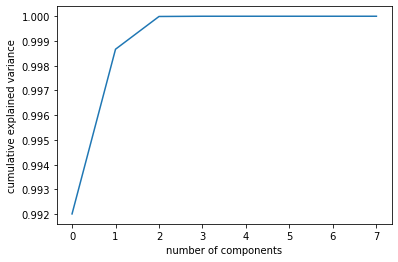

In [63]:
pca_clover = PCA(n_components=np.min(X_clover.shape))
pca_clover.fit(X_clover)

plt.plot(np.cumsum(pca_clover.explained_variance_ratio_))
print(pca_clover.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

[9.89622106e-01 9.43706517e-03 9.29575013e-04 1.12535904e-05
 7.42426432e-13 1.37647847e-13 5.69342998e-14 2.76622599e-15]


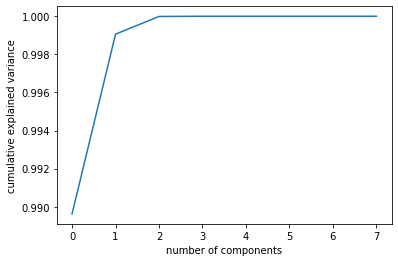

In [64]:
pca_broadl = PCA(n_components=np.min(X_broadl.shape))
pca_broadl.fit(X_broadl)

plt.plot(np.cumsum(pca_broadl.explained_variance_ratio_))
print(pca_broadl.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

original shape:    (41, 8)
transformed shape: (41, 2)


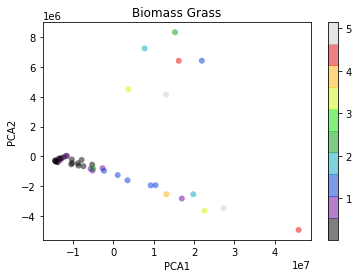

In [65]:
pca_grass = PCA(n_components=2)
pca_grass.fit(X_grass)
X_pca_grass = pca_grass.transform(X_grass)
print("original shape:   ", X_grass.shape)
print("transformed shape:", X_pca_grass.shape)
#print(pca.transform(histogram_data))
plt.scatter(X_pca_grass[:, 0], X_pca_grass[:, 1],
            c=df_grass["Biomass"], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar()
plt.title('Biomass Grass');#commonname

original shape:    (56, 8)
transformed shape: (56, 2)


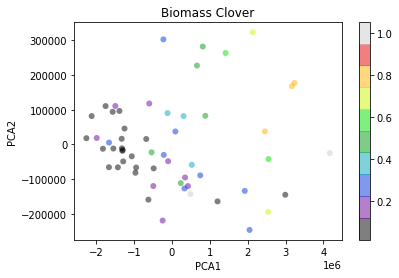

In [66]:
pca_clover = PCA(n_components=2)
pca_clover.fit(X_clover)
X_pca_clover = pca_clover.transform(X_clover)
print("original shape:   ", X_clover.shape)
print("transformed shape:", X_pca_clover.shape)
#print(pca.transform(histogram_data))
plt.scatter(X_pca_clover[:, 0], X_pca_clover[:, 1],
            c=df_clover["Biomass"], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar()
plt.title('Biomass Clover');#commonname

original shape:    (46, 8)
transformed shape: (46, 2)


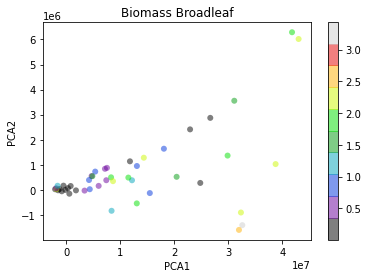

In [70]:
pca_broadl = PCA(n_components=2)
pca_broadl.fit(X_broadl)
X_pca_broadl = pca_clover.transform(X_broadl)
print("original shape:   ", X_broadl.shape)
print("transformed shape:", X_pca_broadl.shape)
#print(pca.transform(histogram_data))
plt.scatter(X_pca_broadl[:, 0], X_pca_broadl[:, 1],
            c=df_broadl["Biomass"], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar()
plt.title('Biomass Broadleaf');#commonname

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Split the data into training/testing sets
#train_X_pca, test_X_pca, train_y3, test_y3 = train_test_split(X_pca[0:460], data["total_bio"][0:460],
#                                                    train_size=0.5,
#                                                    test_size=0.5,
#                                                    random_state=122)
train_X_pca_grass = X_pca_grass
test_X_pca_grass = X_pca_grass
train_y3_grass = df_grass['Biomass']
test_y3_grass = df_grass['Biomass']

train_X_pca_clover = X_pca_clover
test_X_pca_clover = X_pca_clover
train_y3_clover = df_clover['Biomass']
test_y3_clover = df_clover['Biomass']

train_X_pca_broadl = X_pca_broadl
test_X_pca_broadl = X_pca_broadl
train_y3_broadl = df_broadl['Biomass']
test_y3_broadl = df_broadl['Biomass']
#print("Labels for training and testing data")
#print(train_y3_grass)
#print(test_y3_grass)

In [72]:
model_grass = LinearRegression()#fit_intercept=True
# Train the model using the training sets
model_grass.fit(train_X_pca_grass, train_y3_grass)

# Make predictions using the testing set
X_pca_pred_grass = model_grass.predict(test_X_pca_grass)

print("Model slope:    ", model_grass.coef_[0])
print("Model intercept:", model_grass.intercept_)

# The coefficients
print('Coefficients: \n', model_grass.coef_)
# The mean squared error
print('Mean squared error: %.5f'
      % mean_squared_error(test_y3_grass, X_pca_pred_grass))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.5f'
      % r2_score(test_y3_grass, X_pca_pred_grass))

Model slope:     8.084051299270441e-08
Model intercept: 1.3360975609756103
Coefficients: 
 [8.08405130e-08 4.88911013e-08]
Mean squared error: 0.67981
Coefficient of determination: 0.66824


In [73]:
model_clover = LinearRegression()#fit_intercept=True
# Train the model using the training sets
model_clover.fit(train_X_pca_clover, train_y3_clover)

# Make predictions using the testing set
X_pca_pred_clover = model_clover.predict(test_X_pca_clover)

print("Model slope:    ", model_clover.coef_[0])
print("Model intercept:", model_clover.intercept_)

# The coefficients
print('Coefficients: \n', model_clover.coef_)
# The mean squared error
print('Mean squared error: %.5f'
      % mean_squared_error(test_y3_clover, X_pca_pred_clover))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.5f'
      % r2_score(test_y3_clover, X_pca_pred_clover))

Model slope:     1.2738063467266408e-07
Model intercept: 0.28762499999999996
Coefficients: 
 [1.27380635e-07 5.21140247e-07]
Mean squared error: 0.02563
Coefficient of determination: 0.63256


In [74]:
model_broadl = LinearRegression()#fit_intercept=True
# Train the model using the training sets
model_broadl.fit(train_X_pca_broadl, train_y3_broadl)

# Make predictions using the testing set
X_pca_pred_broadl = model_broadl.predict(test_X_pca_broadl)

print("Model slope:    ", model_broadl.coef_[0])
print("Model intercept:", model_broadl.intercept_)

# The coefficients
print('Coefficients: \n', model_broadl.coef_)
# The mean squared error
print('Mean squared error: %.5f'
      % mean_squared_error(test_y3_broadl, X_pca_pred_broadl))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.5f'
      % r2_score(test_y3_broadl, X_pca_pred_broadl))

Model slope:     5.137437448836463e-08
Model intercept: 0.5091445042250411
Coefficients: 
 [ 5.13743745e-08 -1.84538501e-07]
Mean squared error: 0.43190
Coefficient of determination: 0.42894


## Scatter Analysis - Not useful

In [90]:
import skimage
print(skimage.__version__)

0.18.1


In [92]:

import sklearn
print(sklearn.__version__)


0.24.1


## With VI's and CHM

In [ ]:
#df_clover = df_clover[df_clover[['all_exg','m_exg','sd_exg', 'all_exr', 'm_exr', 'sd_exr', 'all_ndi', 'm_ndi','sd_ndi','all_exg_exr','m_exg_exr', 'sd_exg_exr','all_sumbinary','sum_depth']].notna()]
#df['Biomass'][~df.isnull()]
#df_clover.head()
#print(df_withBiomass)

from sklearn.preprocessing import MinMaxScaler

y_grass = pd.DataFrame(df_grass['Biomass'])
y_broadl = pd.DataFrame(df_broadl['Biomass'])
y_clover = pd.DataFrame(df_clover['Biomass'])

scaler_grass = MinMaxScaler()
scaler_broadl = MinMaxScaler()
scaler_clover = MinMaxScaler()

scaler_grass.fit(y_grass)
scaler_clover.fit(y_clover)
scaler_broadl.fit(y_broadl)

y_grass = scaler.transform(y_grass)[:,0]
y_clover = scaler.transform(y_clover)[:,0]
y_broadl = scaler.transform(y_broadl)[:,0]

# Preview y
#y_grass
#y_clover
#y_broadl
y_grass[0:5]
y_broadl[0:5]
y_clover[0:5]

In [ ]:
X_grass = pd.DataFrame(df_grass[['all_exg','m_exg','sd_exg', 'all_exr', 'm_exr', 'sd_exr', 'all_ndi', 'm_ndi','sd_ndi','all_exg_exr','m_exg_exr', 'sd_exg_exr','all_sumbinary','sum_depth']])
X_broadl = pd.DataFrame(df_broadl[['all_exg','m_exg','sd_exg', 'all_exr', 'm_exr', 'sd_exr', 'all_ndi', 'm_ndi','sd_ndi','all_exg_exr','m_exg_exr', 'sd_exg_exr','all_sumbinary', 'sum_depth']])
X_clover = pd.DataFrame(df_clover[['all_exg','m_exg','sd_exg', 'all_exr', 'm_exr', 'sd_exr', 'all_ndi', 'm_ndi','sd_ndi','all_exg_exr','m_exg_exr', 'sd_exg_exr','all_sumbinary', 'sum_depth']])

scaler_grass = MinMaxScaler()
scaler_broadl = MinMaxScaler()
scaler_clover = MinMaxScaler()

scaler_grass.fit(X_grass)
scaler_clover.fit(X_clover)
scaler_broadl.fit(X_broadl)

X_grass = scaler_grass.transform(X_grass)
X_clover = scaler_clover.transform(X_clover)
X_broadl = scaler_broadl.transform(X_broadl)

# Preview normalized data
X_grass[0:5]
X_broadl[0:5]
X_clover[0:5]

In [ ]:
fig, axs = plt.subplots(1,6, figsize=(32, 8))
titles = ['all_exg','m_exg','sd_exg', 'all_exr', 'm_exr', 'sd_exr']

for i, ax in enumerate(axs.flat):
    ax.scatter(X_grass[:,i], y_grass)
    ax.set_title(titles[i],fontsize=18)
fig.text(0.5, 0.04, 'Biomass Grass', ha='center', va='center' ,fontsize=24)
plt.show()

fig, axs = plt.subplots(1,6, figsize=(32, 8))
titles = ['all_exg','m_exg','sd_exg', 'all_exr', 'm_exr', 'sd_exr']

for i, ax in enumerate(axs.flat):
    ax.scatter(X_clover[:,i], y_clover)
    ax.set_title(titles[i],fontsize=18)
fig.text(0.5, 0.04, 'Biomass Clover', ha='center', va='center' ,fontsize=24)
plt.show()

fig, axs = plt.subplots(1,6, figsize=(32, 8))
titles = ['all_exg','m_exg','sd_exg', 'all_exr', 'm_exr', 'sd_exr', 'all_ndi']

for i, ax in enumerate(axs.flat):
    ax.scatter(X_broadl[:,i], y_broadl)
    ax.set_title(titles[i],fontsize=18)
fig.text(0.5, 0.04, 'Biomass Broadleaf', ha='center', va='center' ,fontsize=24)
plt.show()

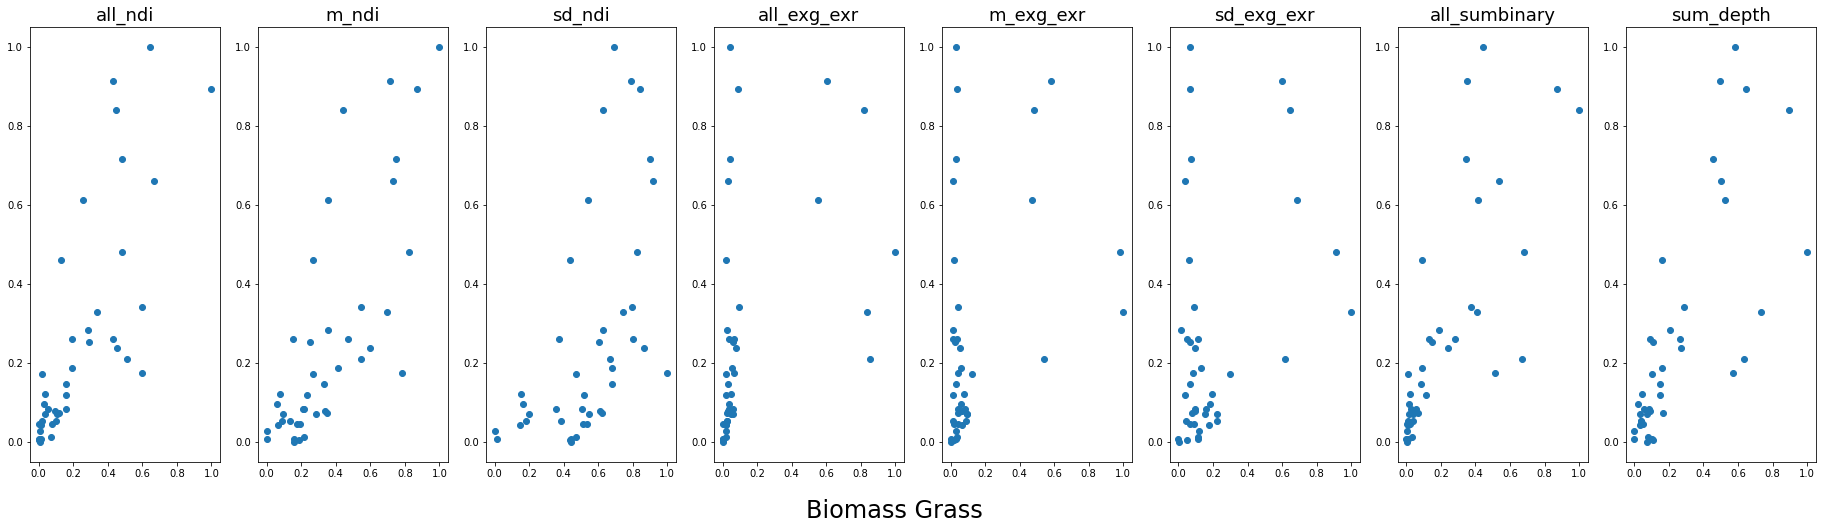

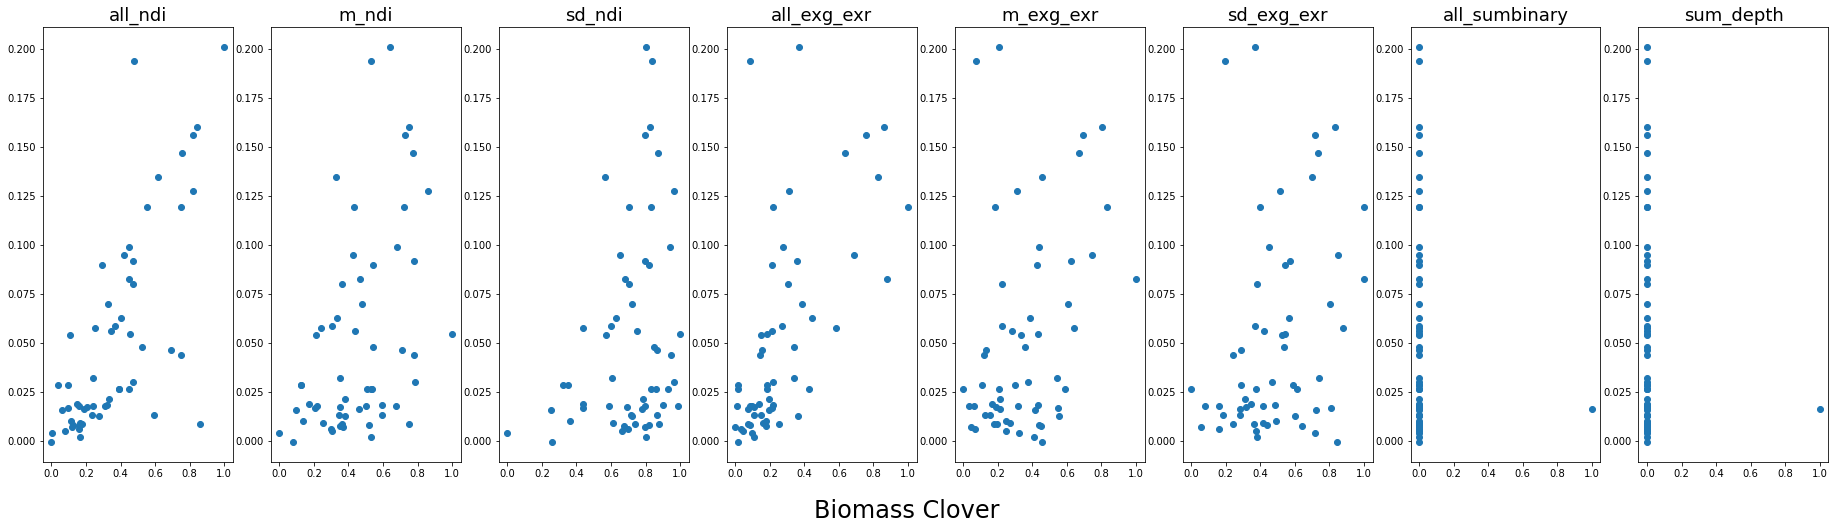

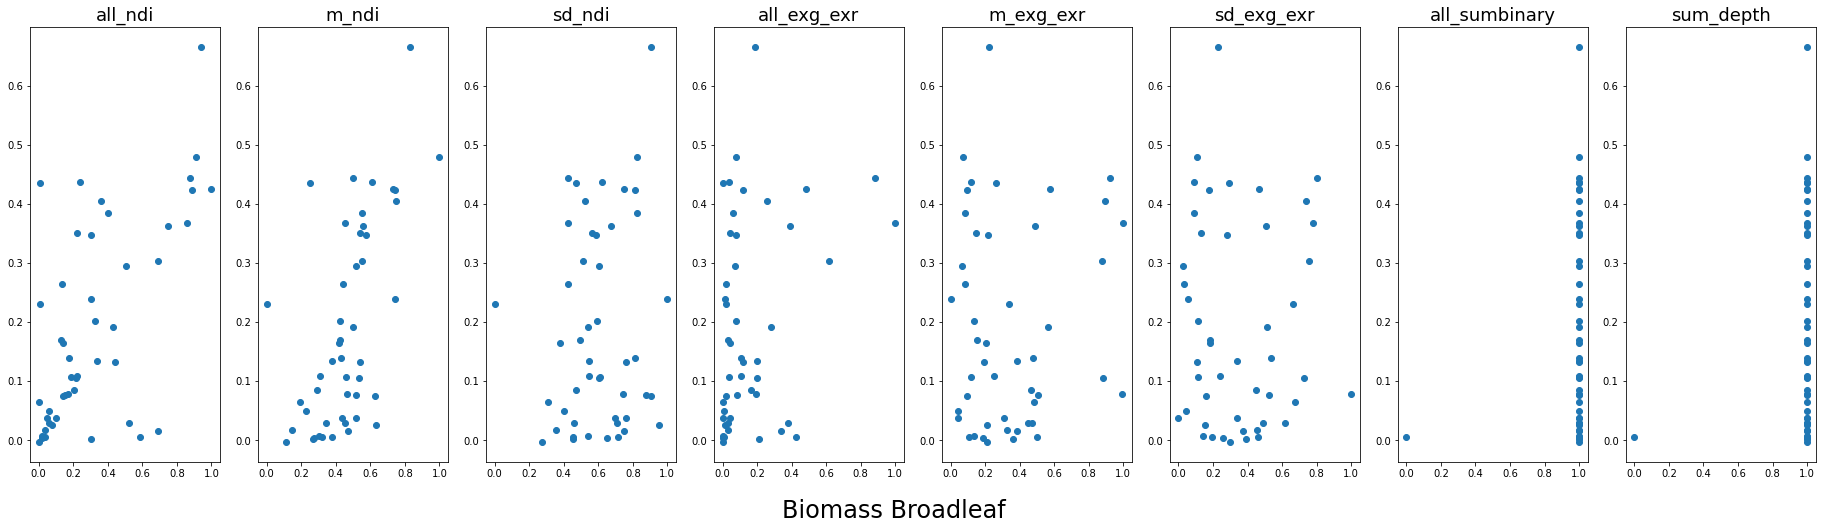

In [38]:
fig, axs = plt.subplots(1,8, figsize=(32, 8))
titles = ['all_ndi', 'm_ndi','sd_ndi','all_exg_exr','m_exg_exr', 'sd_exg_exr','all_sumbinary', 'sum_depth']

for i, ax in enumerate(axs.flat):
    ax.scatter(X_grass[:,i], y_grass)
    ax.set_title(titles[i],fontsize=18)
fig.text(0.5, 0.04, 'Biomass Grass', ha='center', va='center' ,fontsize=24)
plt.show()

fig, axs = plt.subplots(1,8, figsize=(32, 8))
titles = ['all_ndi', 'm_ndi','sd_ndi','all_exg_exr','m_exg_exr', 'sd_exg_exr','all_sumbinary', 'sum_depth']

for i, ax in enumerate(axs.flat):
    ax.scatter(X_clover[:,i], y_clover)
    ax.set_title(titles[i],fontsize=18)
fig.text(0.5, 0.04, 'Biomass Clover', ha='center', va='center' ,fontsize=24)
plt.show()

fig, axs = plt.subplots(1,8, figsize=(32, 8))
titles = ['all_ndi', 'm_ndi','sd_ndi','all_exg_exr','m_exg_exr', 'sd_exg_exr','all_sumbinary', 'sum_depth']

for i, ax in enumerate(axs.flat):
    ax.scatter(X_broadl[:,i], y_broadl)
    ax.set_title(titles[i],fontsize=18)
fig.text(0.5, 0.04, 'Biomass Broadleaf', ha='center', va='center' ,fontsize=24)
plt.show()